In [1]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import pandas as pd
import os
from collections import Counter
from PIL import Image

In [2]:
def threshold(img_array):
    row_avg=[]
    for eachrow in img_array:
        row_avg.append(np.mean(eachrow))
    avg_color=np.mean(row_avg)
    #print(avg_color)
    
    new_image=np.eye(len(img_array))
    
    for row in range(len(img_array)):
        for pixel in range(len(img_array[row])):
            if img_array[row][pixel]>=avg_color:
                new_image[row][pixel]=255
            else:
                new_image[row][pixel]=0
    new_image=np.array(new_image)
    return new_image

def threshold2(img_array):
    new=np.eye(len(img_array))
    rowavg=[]
    for eachrow in img_array:
        rowavg.append(np.mean(eachrow))
    avgcolor=np.mean(rowavg)
    for row in range(len(img_array)):
        for pixel in range(len(img_array[row])):
            if np.mean(img_array[row][pixel])>=avgcolor:
                new[row][pixel]=255
            else:
                new[row][pixel]=0
    new=np.array(new)
    return new

def value(row):
    sum=0
    for i in range(len(row)):
        sum+=row[i]/float(i+1)
    return sum

In [3]:
def sigmoid(x):
    return 1/float((1+np.exp(-x)))

In [4]:
def sigmoidd(x):
    sig=[]
    for row in x:
        r=[]
        for value in row:
            r.append(sigmoid(value))
        sig.append(r)
    return sig

In [5]:
def diff_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [6]:
def diff_sigmoidd(x):
    sig=[]
    for row in x:
        r=[]
        for value in row:
            r.append(diff_sigmoid(value))
        sig.append(r)
    return sig

In [7]:
df=pd.read_csv('C:/Users/hp/datascience/digit_recognition/train_file21.csv')

#replacing all missing data with NaN value
df.replace('?',np.nan,inplace=True)

#deleting the column with id, 1 in the argument indicates 'column', so this will delete the 'column' containing 'id'
#df.drop(['id'],1,inplace=True)
df.drop(['1'],1,inplace=True)
df.drop(['2'],1,inplace=True)
df.drop(['3'],1,inplace=True)
df.drop(['4'],1,inplace=True)
df.drop(['25'],1,inplace=True)
df.drop(['26'],1,inplace=True)
df.drop(['27'],1,inplace=True)
df.drop(['28'],1,inplace=True)
#delete all the rows that have NaN in them
dk=df.dropna()
full_data=dk.values.tolist()
headers = df.dtypes.index
header=headers.tolist()
header2=header[:-1]

points=[]
for column in header:
    points.append(df[column].tolist())
    
for point in points:
    del point[0]   

In [8]:
dataset={}
for i in range(1,len(df)):
    point=[]
    label=df.loc[[i]]['label'].tolist()[0]
    if label not in dataset:
        dataset[label]=[]
    for head in header2:
        point.append(df.loc[[i]][head].tolist()[0])
    dataset[label].append(point)

In [9]:
x=[]
y=[]

for group in dataset:
    label=group
    for each_point in dataset[group][:200]:
        x.append(each_point)
        y.append([label])
        
del x[-1]
del y[-1]
print(y.index([2]))
x=np.array(x[:400])
y=y[:400]
#y=np.array(y)

400


In [10]:
y

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],


In [11]:
def create_layers(data,out):
    epoch=500
    learning_rate=0.1
    input_layer_neurons=data.shape[1] #no. of features in input
    layer_1_neurons=16 #no.of neurons in layer1
    layer_2_neurons=16 #no.of neurons in layer2
    output_neurons=out  #no.of neurons in output layer
    
    return epoch,learning_rate,input_layer_neurons,layer_1_neurons,layer_2_neurons,output_neurons

In [12]:
def initial_weight_and_bais(previous_layer_neurons,current_layer_neurons):
    weight_current_layer=np.random.uniform(size=(previous_layer_neurons,current_layer_neurons))
    bais_current_layer=np.random.uniform(size=(1,current_layer_neurons))
    
    return weight_current_layer,bais_current_layer

In [13]:
epoch,learning_rate,input_layer_neurons,layer_1_neurons,layer_2_neurons,output_neurons=create_layers(x,10)

In [14]:
weight_layer_1,bais_layer_1=initial_weight_and_bais(input_layer_neurons,layer_1_neurons)
weight_layer_2,bais_layer_2=initial_weight_and_bais(layer_1_neurons,layer_2_neurons)
weight_output,bais_output=initial_weight_and_bais(layer_2_neurons,output_neurons)

In [15]:
def make_model(x,weight_layer_1,bais_layer_1,weight_layer_2,bais_layer_2,weight_output,bais_output):
    for i in range(epoch):
        print(i)
    #forward propogation
    
        layer_1_input=np.dot(x,weight_layer_1)+bais_layer_1
        layer_1_activation=np.array(sigmoidd(layer_1_input))

        layer_2_input=np.dot(layer_1_activation,weight_layer_2)+bais_layer_2
        layer_2_activation=np.array(sigmoidd(layer_2_input))

        output_layer_input=np.dot(layer_2_activation,weight_output)+bais_output
        output_layer_activation=np.array(sigmoidd(output_layer_input))

        #backward propogation

        slope_output=diff_sigmoidd(output_layer_activation)
        slope_layer2=diff_sigmoidd(layer_2_activation)
        slope_layer1=diff_sigmoidd(layer_1_activation)

        error_output=y-output_layer_activation  #error at output
        delta_output=error_output*slope_output

        error_layer2=np.dot(delta_output,weight_output.T)
        delta_layer2=error_layer2*slope_layer2

        error_layer1=np.dot(delta_layer2,weight_layer_2.T)
        delta_layer1=error_layer1*slope_layer1

        weight_output+=np.dot(layer_2_activation.T,delta_output)*learning_rate
        bais_output+=np.sum(delta_output,axis=0,keepdims=True)*learning_rate

        weight_layer_2+=np.dot(layer_1_activation.T,delta_layer2)*learning_rate
        bais_layer_2+=np.sum(delta_layer2,axis=0,keepdims=True)*learning_rate

        weight_layer_1+=np.dot(x.T,delta_layer1)*learning_rate
        bais_layer_1+=np.sum(delta_layer1,axis=0,keepdims=True)*learning_rate
    
    return weight_layer_1,bais_layer_1,weight_layer_2,bais_layer_2,weight_output,bais_output

In [16]:
w_1,b_1,w_2,b_2,w_out,b_out=make_model(x,weight_layer_1,bais_layer_1,weight_layer_2,bais_layer_2,weight_output,bais_output)

0
1


c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [17]:
#layer_1_input

In [24]:
def predict(x_predict,w_1,b_1,w_2,b_2,w_out,b_out):
    
    layer_1_input=np.dot(x_predict,w_1)+b_1
    layer_1_activation=np.array(sigmoidd(layer_1_input))

    layer_2_input=np.dot(layer_1_activation,w_2)+b_2
    layer_2_activation=np.array(sigmoidd(layer_2_input))

    output_layer_input=np.dot(layer_2_activation,w_out)+b_out
    output_layer_activation=np.array(sigmoidd(output_layer_input))
    
    return output_layer_activation

In [25]:
def image_data(image,show=False):
    img=Image.open(image)
    if show:
        print('input image:')
        plt.grid(False)
        plt.imshow(img)
        plt.show()
    pred=[]
    image_array=np.array(img)
    try:
        image_t=threshold(image_array)
    except:
        image_t=threshold2(image_array)
    image_t_list=image_t.tolist()
    for row_data in image_t_list:
        pred.append(value(row_data))
    pred=pred[4:24]
    
    return pred

input image:


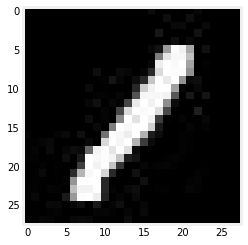

In [38]:
path='C:/Users/hp/datascience/digit_recognition/test_data/1/'
test_imgs=os.listdir(path)
i=np.random.randint(0,len(test_imgs))
pic=test_imgs[i]
img=Image.open(path+pic)
#plt.imshow(img)
#plt.imshow(path+pic)
img_predict=image_data(path+pic,show=True)
#img_predict

In [39]:
output=predict(img_predict,w_1,b_1,w_2,b_2,w_out,b_out)

In [40]:
print(output[0])

[0.23305451 0.23305451 0.23305451 0.23305451 0.23305451 0.23305451
 0.23305451 0.23305451 0.23305451 0.23305451]


In [41]:
print(output[0].tolist().index(max(output[0])))

8
